In [1]:
import pandas as pd
df = pd.read_csv ('di_auc_pareto_frontier.csv')

In [2]:
def get_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    """plot Pareto front
    X - DI , maxX = False
    Y -AUC, maxY = True
    """
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)

    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    return pf_X, pf_Y

In [10]:
di_float_list = df.iloc[:, 0].tolist()

In [4]:
auc_float_list = df.iloc[:, -1].tolist()

In [ ]:
di_float_list

In [12]:
pf_X, pf_Y = get_pareto_frontier(Xs=di_float_list,Ys=auc_float_list)

In [13]:
pf_X, pf_Y

([0.7556, 0.7556, 0.7556, 0.7529, 0.7529, 0.7236, 0.721, 0.721, 0.6463],
 [0.8626, 0.8626, 0.8626, 0.8645, 0.8645, 0.8712, 0.8896, 0.8896, 0.8982])

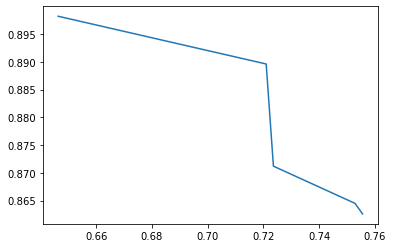

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(pf_X, pf_Y)

In [7]:
baseline_di = 0.49 #worst one wihtout optimization
baseline_auc = 0.88

optimized_di = 0.24 # after optimization
optimized_auc = 0.89

In [8]:
ax.plot(baseline_di, baseline_auc, "rv", label="baseline")

In [9]:
ax.plot(optimized_di, optimized_auc, "gv", label="optimized")